In [1]:
import numpy as np

try:
  %tensorflow_version 2.X
except Exception:
  pass

import tensorflow as tf

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.X`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


# **Getting started to build simple NN:**

estimate fn--> $y = 3X + 50$ from the data $X$ and $y$.

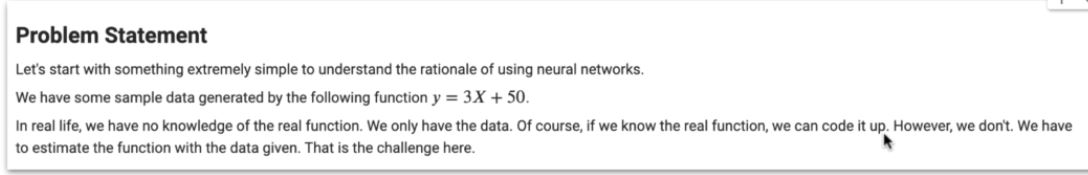

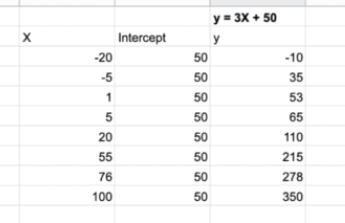

### **Preparing the training data:**


In [2]:
x = np.array([-20,-5,1,5,20,55,76],dtype=float) # independent variable (feature)
y = np.array([-10,35,53,65,110,215,278],dtype=float) # dependent variable (target)

### **Defining Model:**

start with just **one dense layer** and **one neuron**.

first instantiate (create an instance) of a dense layer by **tf.keras.layers.Dense**
> **input_shape = 1** : we are taking only one feature as input i.e. **x**.

> **units = 1**: creating NN with only 1 neuron. (at the o/p layer it is no. of outputs)

In [3]:
layer_1 = tf.keras.layers.Dense(units=1,input_shape = [1]) # only 1 layer with one neuron

model = tf.keras.Sequential([layer_1])

(OR)

In [4]:
# we can define model in this way also:

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=1,input_shape=[1])
])

### **Complie Model:**

using 2 parameters:

1. **Loss fn :** A perforance metric. It measures the error of the model against actual output.Difference b/w prediction and acutal is called loss.hence, loss fn. 

2. **Optimizer fn:** A mathematical fn used to adjust the model parameters(weights) to improve prediction accuracy. 

In [5]:
learning_rate = 0.1 # 0.001 , 0.01, 0.1

model.compile(loss = 'mean_squared_error',
              optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate))

**Tuning the learning rate is very important.**

Increasing the LR increases the step size in gradient descent. It can help you converge faster, but it can also mean you don't hit the bottom of the gradient.

>*Imagine a U-shaped curve , shows **loss**. so the lower you are on the loss, the more accurate your neural network .You have a point somewhere on that curve. You want to move that point to the bottom, where the curve is at a minimum. you calculate the gradient at that point, and it will give you the direction to the bottom, but not how far the bottom is. So you can 'jump' a particular distance in that direction, and then repeat. The learning rate is the size of that jump. 
If it is too big you might not hit the bottom of the 'U' (loss) and If your learning rate is too small, it will take too much time of tiny little jumps to reach the bottom.*



*  **very small LR**: take too much time to converge but more chance to get lowest loss value.
*   **very large LR** : converge faster but less chance to get lowest loss value.




**Adam : (derived from adaptive moment estimation)**

Adam optimization algorithm  can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.

Stochastic gradient descent maintains a single learning rate (termed alpha) for all weight updates and the learning rate does not change during training.
A learning rate is maintained for each network weight (parameter) and separately adapted as learning unfolds.

Adam method computes individual adaptive learning rates for different parameters from estimates of first and second moments of the gradients.


### **Training Model:** using *fit* method.

1. NN starts with random weights($w$). use $w$ and input($x$) to compute output($y$). the prediction having large error as w start with random value.
2. using predicted and actual value calculate loss (using loss fn sepecified in model).
3. The optimizer fn make slightly adjustment (based on learning rate) into $w$ to reduce loss .
4. step 1,2,3 is called as one epoch (iteration).

>**epoch** is how many cycles should run.

>**verbose** controls how much output the to display on the console.


In [6]:
history = model.fit(x,y,epochs=1000,verbose=False)

### **Visualize Model Training:**  plot epoch Vs loss

The *fit* method is having *history* to return training history statistics.



In [7]:

import matplotlib.pyplot as plt

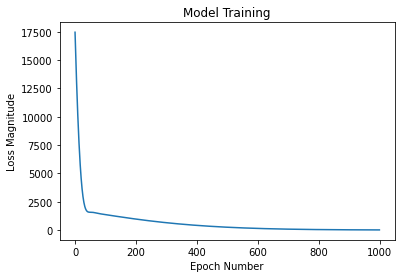

In [8]:
plt.figure(figsize = (6,4))
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.title('Model Training')
plt.plot(history.history['loss'])

### **Prediction on new data:**

In [9]:
model.predict([100.0])

array([[351.26337]], dtype=float32)

In [10]:
model.get_weights() # array1 ---> slope(m) and array2 ---> intercept or bias(c) [mx + c--> 3x + 50]

[array([[3.0455716]], dtype=float32), array([46.706203], dtype=float32)]

# **Neural Network Achitecture:**

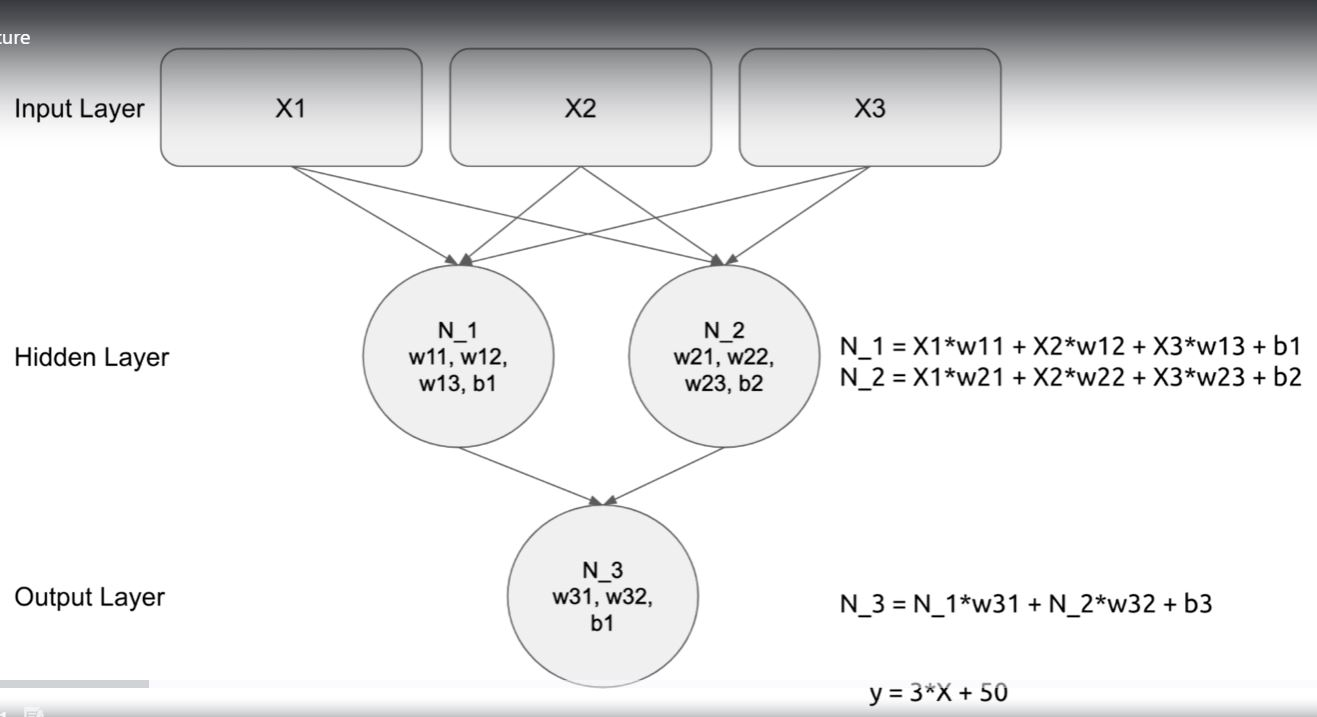

Neural Network  having 3 layers:

>**input layer**: A layer which accepts feature or i/p data as i/p.

>**Hidden layer:** It is called 'Hidden' becoz it is not exposed to input and output. There can be any no. of hidden layers based on model.

> **Output layer:** gives output.

**Fully connected layer:** every neurons of each layer is connected to all the neurons of next layer.

NN operation:
each input is multiplied by weight . all weighted inputs are added along with bias. Now activation fn is applied on the added weighted inputs to produce output.



### **NN model of 1 neuron and 1 layer:** 
(above problem)
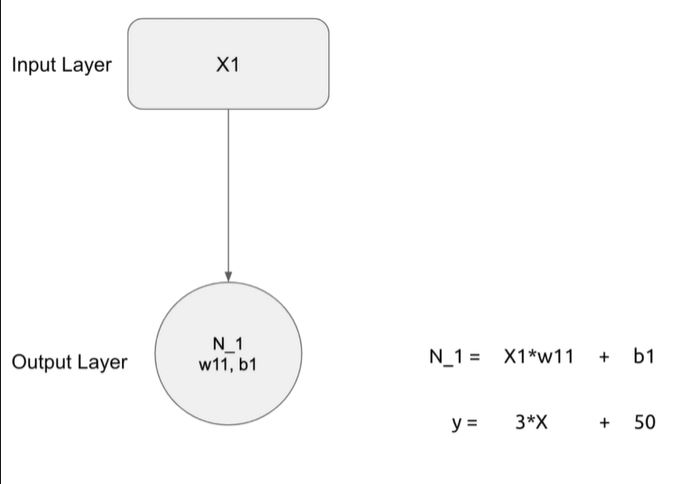

# **Projet MNIST:** (Multiclass Classification Problem)

source:[MNIST](https://yann.lecun.com/exdb/mnist/)

a training set of 60,000 images and a test set of 10,000 images.

prediction:the new data (digit image) belongs to which class from  1 t0 10.

In [11]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [12]:
x_train.shape

(60000, 28, 28)

In [13]:
x_test.shape

(10000, 28, 28)

In [14]:
y_train.shape

(60000,)

In [15]:
y_test.shape

(10000,)

In [16]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [17]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

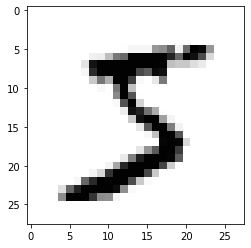

In [18]:
plt.imshow(x_train[0],cmap = 'Greys')

In [19]:
y_train[0]

5

In [20]:
x_train,x_test = x_train / 255.0, x_test / 255.0  # normalize the data by dividing it to 255.0 (range: 0 to 1)

### **Model 1:**

1. Flatten layer : Flattens the digits images. convert 2 - d array to 1-d array  [(28 x 28) ---> 784 (28*28)]. only reformats the data.

2. Dense layer : A densoly connected 512 neurons. Each neurons takes i/p from all 784 nodes in the previous layer.

3. Dense layer : (last layer) a 10 nodes *softmax* layer , each node representing each label.It takes i/p from 512 nodes in the previous layer.
each node weights the input according to the learned parameter and then outputs value in the range of 0 to 1. representing probability that the image belongs to that class.

In [21]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape = (28,28)),
                             tf.keras.layers.Dense(units = 512,activation='relu'),
                             tf.keras.layers.Dense(units=10,activation='softmax')
])

model.summary()
model.compile(optimizer='RMSProp',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
h = model.fit(x_train,y_train,epochs=10,batch_size=256)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
235/235 [==============================] - 1s 3ms/step - loss: 0.3088 - accuracy: 0.9118
Epoch 2/10
235/235 [==============================] - 1s 3ms/step - loss: 0.1303 - accuracy: 0.9617
Epoch 3/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0855 - accuracy: 0.9749
Epoch 4/10
235/235 [==============================] - 1s 3ms/step - loss: 0.06

The batch size tells the *model.fit* to update the model variable after every batches of 256 images. 

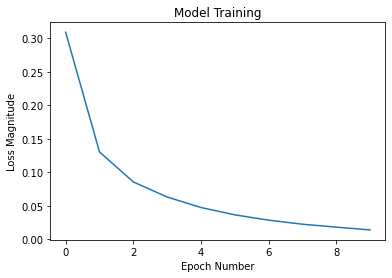

In [22]:
plt.figure(figsize = (6,4))
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.title('Model Training')
plt.plot(h.history['loss'])

In [23]:
loss,acc = model.evaluate(x_test,y_test)
print('loss:{:.4f}'.format(loss))
print('test accuracy:{:.4f}'.format(acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.0573 - accuracy: 0.9835
loss:0.0573
test accuracy:0.9835


### **Model 2:**


In [24]:
model2 = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape = (28,28)),
                             tf.keras.layers.Dense(units = 128,activation='relu'), # reduce unit to 128
                              tf.keras.layers.Dropout(0.2), # added dropout layer
                             tf.keras.layers.Dense(units=10,activation='softmax')
])

model2.summary()
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) # adam optimizer is used
h = model2.fit(x_train,y_train,epochs=10,batch_size=256)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
235/235 [==============================] - 1s 2ms/step - loss: 0.4863 - accuracy: 0.8633
Epoch 2/10
235/235 [==============================] - 1s 2ms/step - loss: 0.2283 - accuracy: 0.9349
Epoch 3/10
235/235 [==========================

**Dropout layer:** 


forcing keras to randomly drop 20% (if Dropout(0.2) -->20%) of neuron from model during training phase. so that the other neurons work harder and also it does not allow model to memorize training data in order to avoid overfitting.

It slightly work as a regularization method.

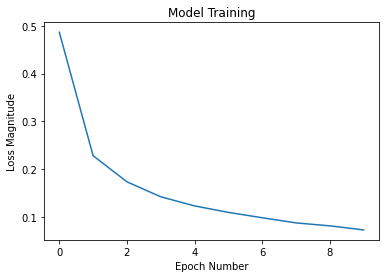

In [25]:
plt.figure(figsize = (6,4))
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.title('Model Training')
plt.plot(h.history['loss'])

In [26]:
loss,acc = model2.evaluate(x_test,y_test)
print('loss:{:.4f}'.format(loss))
print('test accuracy:{:.4f}'.format(acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.0734 - accuracy: 0.9766
loss:0.0734
test accuracy:0.9766


(Train accuracy - Test accuracy ) is less in model 2 than model 1.
so model 2 is not overfitted and we consider it for prediction.

**Prediction:**

In [27]:
img = x_test[0] # new i/p 
print(img.shape)
img = np.array([img])
print(img.shape)

(28, 28)
(1, 28, 28)


In [28]:
pred = model2.predict(img)
np.set_printoptions(formatter={'float':'{:.2f}'.format})
print('prediction:\n',pred*100)

prediction:
 [[0.00 0.00 0.00 0.08 0.00 0.00 0.00 99.91 0.00 0.00]]


According to prediction array --> the index value 7 shows the highest probability of 99% that means the model is 99% sure that new image data represents 7. 

In [29]:
np.argmax(pred[0]) # predicted label

7

In [30]:
y_test[0] # actual label

7

# **Project MNIST:** (Binary Class Classification Problem)

prediction : whether the new data (digit image) is 5 or not ?

In [31]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [32]:
tf.keras.backend.image_data_format()

'channels_last'

channel last = input_shape(r,c,channel)

channel first = input_shape(channel,r,c)

In [33]:
r,c = 28,28

if tf.keras.backend.image_data_format() == 'channels_first':
  x_train = x_train.reshape(x_train.shape[0],1,r,c) # (60000,1,28,28)
  x_test = x_test.reshape(x_test.shape[0],1,r,c)
  input_shape = (1,r,c)
elif tf.keras.backend.image_data_format() == 'channels_last':
  x_train = x_train.reshape(x_train.shape[0],r,c,1) # (60000,28,28,1)
  x_test = x_test.reshape(x_test.shape[0],r,c,1)
  input_shape = (r,c,1)

In [34]:
y_train = np.where(y_train != 5,0,1)  # if 5 then y  = 1 else 0.

In [35]:
#y_train = np.asarray(y_train.astype('float32'))
#y_test = np.asarray(y_test.astype('float32'))

### **Model:**

In [36]:
batch_size = 128
num_class = 1
epoch = 20

model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape = input_shape),
                             tf.keras.layers.Dense(units = 128,activation='relu'),
                             tf.keras.layers.Dense(units=num_class,activation='sigmoid')
])

model.summary()
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy']) 


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 100,609
Trainable params: 100,609
Non-trainable params: 0
_________________________________________________________________


In [37]:
x_val = x_train[50000:]
x_train1 = x_train[:50000]
y_val = y_train[50000:]
y_train1 = y_train[:50000]

In [38]:
h = model.fit(x_train1,y_train1,epochs=epoch,batch_size=batch_size,validation_data=(x_val,y_val))

Epoch 1/20
391/391 [==============================] - 1s 3ms/step - loss: 0.2582 - accuracy: 0.9008 - val_loss: 0.1989 - val_accuracy: 0.9123
Epoch 2/20
391/391 [==============================] - 1s 3ms/step - loss: 0.1717 - accuracy: 0.9300 - val_loss: 0.1517 - val_accuracy: 0.9475
Epoch 3/20
391/391 [==============================] - 1s 3ms/step - loss: 0.1393 - accuracy: 0.9519 - val_loss: 0.1284 - val_accuracy: 0.9590
Epoch 4/20
391/391 [==============================] - 1s 3ms/step - loss: 0.1216 - accuracy: 0.9600 - val_loss: 0.1149 - val_accuracy: 0.9632
Epoch 5/20
391/391 [==============================] - 1s 3ms/step - loss: 0.1101 - accuracy: 0.9648 - val_loss: 0.1058 - val_accuracy: 0.9670
Epoch 6/20
391/391 [==============================] - 1s 3ms/step - loss: 0.1017 - accuracy: 0.9682 - val_loss: 0.0989 - val_accuracy: 0.9701
Epoch 7/20
391/391 [==============================] - 1s 3ms/step - loss: 0.0950 - accuracy: 0.9703 - val_loss: 0.0934 - val_accuracy: 0.9724
Epoch 

In [39]:
loss = h.history['loss']
val_loss = h.history['val_loss']

epochs = range(1,len(h.history['accuracy'])+1)

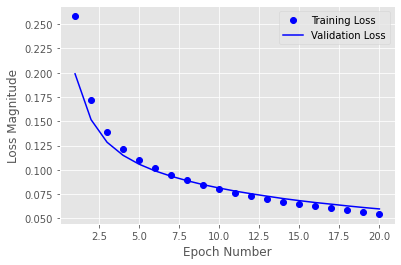

In [40]:
plt.figure(figsize = (6,4))

plt.style.use('ggplot')
plt.plot(epochs,loss,'bo',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.legend()


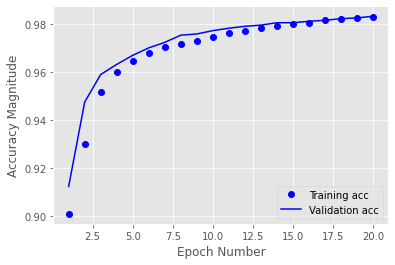

In [41]:
acc = h.history['accuracy']
val_acc = h.history['val_accuracy']

epochs = range(1,len(h.history['accuracy'])+1)

plt.figure(figsize = (6,4))

plt.style.use('ggplot')
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy Magnitude')
plt.legend()


**Prediction on new data**:

In [42]:
def out(img):
  img = img # new i/p 
  img = np.array([img])
  pred = model.predict(img)
  if pred[0] < 0.5:
    print("not a 5")
  else:
    print("it is 5")
  return pred[0]

In [43]:
np.where(y_test == 5) # index values of 5

(array([   8,   15,   23,   45,   52,   53,   59,  102,  120,  127,  129,
         132,  152,  153,  155,  162,  165,  167,  182,  187,  207,  211,
         218,  219,  240,  253,  261,  283,  289,  317,  319,  333,  340,
         347,  351,  352,  356,  364,  367,  375,  395,  397,  406,  412,
         433,  460,  469,  478,  483,  491,  502,  509,  518,  540,  570,
         588,  604,  618,  638,  645,  654,  674,  692,  694,  710,  711,
         720,  739,  751,  766,  778,  779,  785,  791,  797,  812,  856,
         857,  866,  869,  897,  934,  935,  951,  955,  970,  978, 1003,
        1022, 1032, 1041, 1046, 1070, 1073, 1082, 1087, 1089, 1102, 1113,
        1115, 1131, 1135, 1144, 1146, 1168, 1169, 1190, 1221, 1233, 1235,
        1243, 1252, 1258, 1272, 1281, 1285, 1289, 1299, 1331, 1334, 1339,
        1340, 1370, 1376, 1378, 1393, 1405, 1406, 1421, 1447, 1460, 1466,
        1467, 1471, 1473, 1476, 1493, 1510, 1521, 1525, 1550, 1598, 1618,
        1629, 1635, 1637, 1639, 1641, 

In [44]:
print(y_test[5579])
print(out(x_test[5579]))

5
it is 5
[0.96]


In [45]:
print(y_test[4])
print(out(x_test[4]))

4
not a 5
[0.00]


In [46]:
print(y_test[45])
print(out(x_test[45]))

5
it is 5
[0.87]


In [47]:

print(y_test[127])
print(out(x_test[127]))

5
it is 5
[0.99]


In [48]:
print(y_test[8])   # wrong prediction
print(out(x_test[8]))

5
not a 5
[0.04]


In [49]:
print(y_test[7])
print(out(x_test[7]))

9
not a 5
[0.03]


In [50]:
print(y_test[11])
print(out(x_test[11]))

6
not a 5
[0.00]


In [51]:
print(y_test[25])
print(out(x_test[25]))

0
not a 5
[0.00]
